In [1]:
""" This is the first stab at learning features... 

CURRENTLY TESTING:
Training feature 1: Avg of intervals
Training feature 2: Avg # of steps between notes

    Normaled by scaling both to range of 0 to 1:
        x_scaled = (x - min(x)) / (max(x) - min(x))    

FEEDBACK FROM HENRY:
Averaging takes away from those features being the distinctive factor differentiating between major/minor. 
Selecting features is essential in machine learning and should be thought of as selective enough distinctive 
attributes to still be differentiable, but not so many that all elements are completely unique (still need to 
find the common thread between similar elements)

Try out histograms! Rather than averaging note intervals, potentially group frequencies of specific intervals
into buckets representating ranges that help differentiate between major vs. minor. 

Could also look into frequency of notes, or give weight to specific notes over others in cost function. Downplay 
weight of those notes too commons across both major/minor keys, and potentially play up weight of notes that are
in infrequently used keys.

"""

###############################################

import music21
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
training_data = []

# read test files and construct columns
filenames = open('test_files.txt').read().split('\n')

for filename in filenames:
    
    # Create empty score_instance to hold data of training features + outcome
    score_instance = {} 

    # Convert MIDI file to score and iterate over notes in score 
    # Save relevant individual Note attributes into list (incl. Note obj, name, freq, major/minor at given measure)
    score = music21.converter.parse('MIDI test files/Cello solos/' + filename)
    note_attributes = []
    for note in music21.alpha.theoryAnalysis.theoryAnalyzer.getNotes(score, 0):
        if note == None:
            pass
        else:
            measure = int(note.offset)
            key = music21.alpha.theoryAnalysis.theoryAnalyzer.getKeyAtMeasure(score, measure)
            note_attributes.append([note, note.nameWithOctave, note.frequency, key.mode])
    print "Note attributes for file {} completed".format(filename)
            
    # Calculate global attributes of score (incl: Avg interval, avg steps, is_major)
    # Note: At the moment, this doesn't take into account changes b/w major + minor w/in a score
    intervals, steps = [], []
    for i in range(1, len(note_attributes)):
        interval = abs(float(note_attributes[i][2]) - float(note_attributes[i-1][2]))
        intervals.append(interval)

        interval_obj = music21.interval.Interval(noteStart=note_attributes[i][0], noteEnd=note_attributes[i-1][0])
        step = (abs(interval_obj.cents)/200.00)
        steps.append(step)

    mode_at_measure_0 = music21.alpha.theoryAnalysis.theoryAnalyzer.getKeyAtMeasure(score, 0).mode
    is_major = (mode_at_measure_0 == 'major')
    avg_interval = sum(intervals) / len(intervals)
    avg_steps = sum(steps) / len(steps)

    
    # Saves all global attributes into a dictionary and appends to global set of all training data
    # Used to create df and plt below
    score_instance['avg_interval'] = avg_interval
    score_instance['avg_steps'] = avg_steps
    score_instance['is_major'] = is_major    
    
    print "Global attributes include: {}".format(score_instance)
    training_data.append(score_instance)

Note attributes for file cs1-1pre.mid completed
Global attributes include: {'avg_interval': 43.62011257051648, 'avg_steps': 2.0135135135135136, 'is_major': True}
Note attributes for file cs1-2all.mid completed
Global attributes include: {'avg_interval': 38.09590546731629, 'avg_steps': 1.723986856516977, 'is_major': True}
Note attributes for file cs1-3cou.mid completed
Global attributes include: {'avg_interval': 40.036517564724036, 'avg_steps': 1.970406905055487, 'is_major': True}
Note attributes for file cs1-4sar.mid completed
Global attributes include: {'avg_interval': 32.51300563173759, 'avg_steps': 1.5752895752895753, 'is_major': True}
Note attributes for file cs1-5men.mid completed
Global attributes include: {'avg_interval': 38.89915221991372, 'avg_steps': 1.9563182527301093, 'is_major': True}
Note attributes for file cs1-6gig.mid completed
Global attributes include: {'avg_interval': 35.11262636200494, 'avg_steps': 1.6288782816229117, 'is_major': True}
Note attributes for file cs2-

In [12]:
all_intervals = [instance['avg_interval'] for instance in training_data]
all_steps = [instance['avg_steps'] for instance in training_data]

max_int, min_int = max(all_intervals), min(all_intervals)
max_steps, min_steps = max(all_steps), min(all_steps)

for instance in training_data:
    instance['scaled_interval'] = abs(instance['avg_interval'] - max_int) / (max_int - min_int)
    instance['scaled_steps'] = abs(instance['avg_steps'] - max_steps) / (max_steps - min_steps)

print training_data

[{'scaled_steps': 0.5182081132450155, 'avg_interval': 43.62011257051648, 'avg_steps': 2.0135135135135136, 'is_major': True, 'scaled_interval': 0.48498333674470145}, {'scaled_steps': 0.6831285116740555, 'avg_interval': 38.09590546731629, 'avg_steps': 1.723986856516977, 'is_major': True, 'scaled_interval': 0.6808831872688421}, {'scaled_steps': 0.5427625329159731, 'avg_interval': 40.036517564724036, 'avg_steps': 1.970406905055487, 'is_major': True, 'scaled_interval': 0.6120650541493787}, {'scaled_steps': 0.7678295720867119, 'avg_interval': 32.51300563173759, 'avg_steps': 1.5752895752895753, 'is_major': True, 'scaled_interval': 0.878864403912139}, {'scaled_steps': 0.5507877219570545, 'avg_interval': 38.89915221991372, 'avg_steps': 1.9563182527301093, 'is_major': True, 'scaled_interval': 0.6523983901154768}, {'scaled_steps': 0.7373043317117077, 'avg_interval': 35.11262636200494, 'avg_steps': 1.6288782816229117, 'is_major': True, 'scaled_interval': 0.7866764567615314}, {'scaled_steps': 0.711

    scaled_interval  scaled_steps is_major
0          0.484983      0.518208     True
1          0.680883      0.683129     True
2          0.612065      0.542763     True
3          0.878864      0.767830     True
4          0.652398      0.550788     True
5          0.786676      0.737304     True
6          0.744760      0.711280    False
7          0.808520      0.718759    False
8          0.491063      0.606577    False
9          0.886976      0.734941    False
10         0.756743      0.783286    False
11         0.772443      0.678438    False
12         0.385886      0.337261     True
13         0.698145      0.605999     True
14         0.594430      0.484184    False
15         0.954585      0.788808     True
16         0.704249      0.687440     True
17         0.630099      0.661888     True
18         0.207571      0.144231     True
19         0.893305      0.786187    False
20         0.701525      0.634646    False
21         0.947228      0.906862     True
22         

(-0.1, 1.1)

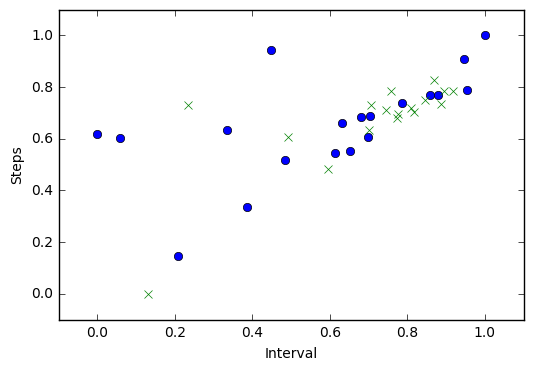

In [13]:
# Create dataframe to hold relevant training feature and outcome data
df = pd.DataFrame(training_data, columns=['scaled_interval', 'scaled_steps', 'is_major'])
print df
# Plot training data, O = major outcome, x = minor outcome
is_major_filter = (df['is_major'] == True)
is_minor_filter = (df['is_major'] == False)

plt.plot(df[is_major_filter]['scaled_interval'], 
         df[is_major_filter]['scaled_steps'], 
         linestyle='', 
         marker='o')
plt.plot(df[is_minor_filter]['scaled_interval'], 
         df[is_minor_filter]['scaled_steps'], 
         linestyle='', 
         marker='x')

plt.xlabel('Interval')
plt.ylabel('Steps')
plt.ylim((-0.1, 1.1 ))
plt.xlim((-0.1, 1.1 ))